
# About Delhivery : 

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


# Business Problem Statement  :


- The company wants to understand and process the data coming out of data engineering pipelines:

>• Clean, sanitize and manipulate data to get useful features out of raw fields

>• Make sense out of the raw data and help the data science team to build forecasting models on it.


### Column Profiling:

- data :  tells whether the data is testing or training data


- trip_creation_time : Timestamp of trip creation
- route_schedule_uuid : Unique Id for a particular route schedule
- route_type : Transportation type 
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
    
- trip_uuid : Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center : Source ID of trip origin
- source_name : Source Name of trip origin
- destination_cente : Destination ID
- destination_name : Destination Name
- od_start_time : Trip start time
- od_end_time : Trip end time
- start_scan_to_end_scan : Time taken to deliver from source to destination
- is_cutoff : Unknown field
- cutoff_factor : Unknown field
- cutoff_timestamp : Unknown field
- actual_distance_to_destination : Distance in Kms between source and destination warehouse
- actual_time : Actual time taken to complete the delivery (Cumulative)
- osrm_time : An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance : An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor : Unknown field
- segment_actual_time : This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time : This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance : This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor : Unknown field





- #### In-depth analysis and feature engineering to be done : 
    
    > - time taken between od_start_time and od_end_time 
    
    > - hypothesis testing/ Visual analysis : population mean of start_scan_to_end_scan & time taken between od_start_time and od_end_time
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and OSRM time aggregated value 
            
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and segment actual time 
            
    > - hypothesis testing/ visual analysis : 
            - osrm distance aggregated value and segment osrm distance 
            
    > - hypothesis testing/ visual analysis :
            - osrm time aggregated value and segment osrm time aggregated value
            
            
    > - outliers in the numerical variables 
    
    > - outliers using the IQR method.
    
    > - one-hot encoding of categorical variables (like route_type)
    
    > - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("delhivery_data.txt")

In [4]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Understanding shape and structure of data : 

In [5]:
df.shape

(144867, 24)

In [6]:
# 144,867 total Records 
# 24 columns 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
# features : source_name and destination_name having few missing values

## Changing data type for data and time related features : 


In [10]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

## Extracting Trip Creation Informations from Trip Creation time : 

In [11]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [12]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

In [13]:
# delivery trip data is given from Septemebr and October 2018.

In [14]:
df["trip_creation_day"] = (df["trip_creation_time"].dt.day_name())

<AxesSubplot:>

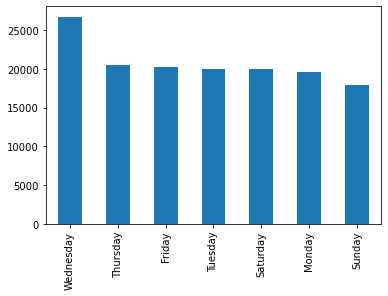

In [15]:
df["trip_creation_day"].value_counts().plot(kind = "bar")

In [16]:
# wednesday seems to have relatively higher records of data compare to other days . 
df["trip_creation_day"].value_counts(normalize=True)*100

Wednesday    18.452788
Thursday     14.137795
Friday       13.972816
Tuesday      13.778845
Saturday     13.761588
Monday       13.560714
Sunday       12.335453
Name: trip_creation_day, dtype: float64

# Understanding the structure : 

In [17]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
trip_creation_da

### we have `14817 different trips happended between source to destinations.` 
### total ` 1504 delivery routes` we have.

#### 1508 unique source centers 
#### 1481 unique destination centres 


## There are two different kind of routes are there : 

In [18]:
df.groupby("route_schedule_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts()

Carting    922
FTL        582
Name: route_type, dtype: int64

In [19]:
df.groupby("route_schedule_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100

Carting    61.303191
FTL        38.696809
Name: route_type, dtype: float64

In [20]:
routeType_plot= (df.groupby("route_schedule_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100)
routeType_plot

Carting    61.303191
FTL        38.696809
Name: route_type, dtype: float64

<AxesSubplot:ylabel='route_type'>

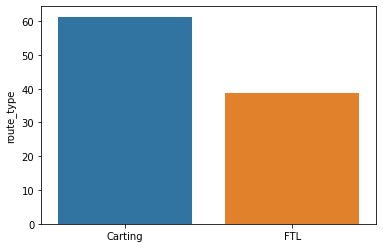

In [21]:
sns.barplot(x= routeType_plot.index,
           y = routeType_plot)

#### From `1504 total different routes` , we have 
#### 922 `(61%)` of the routes are `Carting` , which consists of small vehicles and 
#### 582 `(38.69%)` of total routes are `FTL` : which are Full Truck Load get to the destination sooner.  as no otther pickups  or drop offs along the way . 

In [22]:
# df.groupby("trip_uuid")["route_type"].unique().value_counts()

# Undestanding Features and Feature Engineering  :

## Analyzing records for one particular trip id : 


In [23]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Thursday
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Thursday
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Thursday
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Thursday
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,

    from above one particular trip record , 
    trip is segmented between different drop locations .

    we can observe 
    trip is taking stops between mentioned source and destination centers(warehouses).
    od-end-tiem and od-start-time are the time when the that particular trip was ended and started .

    start-scan-to-end-scan is the time duration of trips are being scanned when start and end. 
    start-scan-to-end-scan time is given cummulative. which is not given per trip segments.


    trip cut off False ,shows the record of trip when trip changes from one warehouse to another. between source to destination. 


    Actual-time given is the time to complete the entire delivery from source to destination (given cumulatively )




    osrm -time is an open rourse routing engine time calculator which computes the shortest path between points in a given map and gives the time and osrm distance gives the shortest distance (given cumulatively )


    Actual-distnace-to-destination is the actual distance between warehouses , given cummulative during the trip . 
    every time cutoff is False , distance count starts from begining. 

    Segmment actual time,  is the actual time taken between two stops in between trips. given per each segment (taken between subset of package delivery)

    segment osrm time is the osrm segment time , taken between subset of package delivery




### Extracting Features like city - place - code -state from source and destination name columns : 

In [24]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [25]:
df["source_place"] = df["source_name"].str.split("_",n=2,expand=True)[1]
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand=True)[1]



In [26]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

In [27]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Thursday,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Thursday,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Thur


####  Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan : 

In [28]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

#### Converting given time duration features into hours . 
    start_scan_to_end_scan
    actual_time
    osrm_time
    segment_actual_time
    segment_osrm_time
    

In [29]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60


In [30]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,45,2018-09-20 21:57:20,45.258278,1.566667,1.000000,67.9280,1.566667,0.200000,0.200000,8.1858,1.000000,Thursday,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,54,2018-09-20 21:31:18,54.092531,2.000000,1.266667,85.6829,1.578947,0.433333,0.350000,17.3725,1.238095,Thursday,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-1537460668435551

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [32]:
df.isna().sum()

data                                     0
trip_creation_time                       0
route_schedule_uuid                      0
route_type                               0
trip_uuid                                0
source_center                            0
source_name                            293
destination_center                       0
destination_name                       261
od_start_time                            0
od_end_time                              0
start_scan_to_end_scan                   0
is_cutoff                                0
cutoff_factor                            0
cutoff_timestamp                         0
actual_distance_to_destination           0
actual_time                              0
osrm_time                                0
osrm_distance                            0
factor                                   0
segment_actual_time                      0
segment_osrm_time                        0
segment_osrm_distance                    0
segment_fac

In [33]:
df.shape

(144867, 34)

## Data cleaning : 

In [34]:
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

In [35]:
df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [36]:
df["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)


In [37]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [38]:
df["source_city_state"].nunique()

1249

In [39]:
df["destination_city_state"].nunique()

1242

In [40]:
df["source_state"].nunique()

33

In [41]:
df["destination_state"].nunique()

32

from source : https://worldpopulationreview.com/countries/cities/india


India has 48 cities with more than a million people, 405 cities with between 100,000 and 1 million people, and 2500 cities with between 10,000 and 100,000 people. The largest city in India is Mumbai, with a population of people.

In [42]:
## Delhivery delivered in approdimately 1250 cities and almost all the states all over in india. 

In [43]:
data = df.copy()

In [44]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [45]:
# data[["source_city","source_state","destination_city","destination_state","source_city_state","destination_city_state"]].fillna()

In [46]:
# above data we impute after aggregating as per tripIDs. 

In [47]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [48]:
data.drop(['source_center',"source_name","destination_center","destination_name","cutoff_timestamp"],axis = 1,inplace=True)

In [49]:
data.drop(["od_end_time","od_start_time"],axis = 1 , inplace=True)

In [50]:
data.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,9,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,18,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,27,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,36,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,False,39,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.816667,True,9,10.403038,0.250000,0.183333,12.1171,1.363636,0.250000,0.183333,12.1171,1.363636,Thursday,Khambhat,Gujarat,Anand,Gujarat,MotvdDPP,Vaghasi,388620,388320,1.819553,Khambhat Gujarat,Anand Gujarat
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.816667,True,18,18.045481,0.733333,0.283333,21.2890,2.588235,0.466667,0.100000,9.1719,4.666667,Thursday,Khambhat,Gujarat,Anand,Gujarat,MotvdDPP,Vaghasi,388620,388320,1.819553,Khambhat Gujarat,Anand Gujarat
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.816667,True,27,28.061896,1.083333,0.483333,35.8252,2.241379,0.350000,0.183333,14.5362,1.909091,Thursday,Khambhat,Gujarat,Anand,Gujarat,MotvdDPP,Vaghasi,388620,388320,1.819553,Khambhat Gujarat,Anand Gujarat
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.816667,True,36,38.939167,1.266667,0.650000,47.1900,1.948718,0.166667,0.166667,11.3648,1.000000,Thursday,Khambhat,Gujarat,Anand,Gujarat,MotvdDPP,Vaghasi,388620,388320,1.819553,Khambhat Gujarat,Anand Gujarat
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.816667,False,43,43.595802,1.700000,0.750000,53.2334,2.266667,0.433333,0.100000,6.0434,4.333333,Thursday,Khambhat,Gujarat,Anand,Gujarat,MotvdDPP,Vaghasi,388620,388320,1.819553,Khambhat Gujarat,Anand Gujarat


# Aggregating Data : 

In [51]:
actual_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()

In [52]:
actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


In [53]:
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()


In [54]:
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()


In [55]:
osrm_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()

In [56]:
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()


In [57]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)

In [58]:
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 


In [59]:
osrm_distance = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()
actual_distance_to_destination = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
segment_osrm_distance = data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()


In [60]:
actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500
...,...,...
14812,trip-153861095625827784,57.762332
14813,trip-153861104386292051,15.513784
14814,trip-153861106442901555,38.684839
14815,trip-153861115439069069,134.723836


## Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan : 

In [61]:
# As we can observe , time taken between od-start and od-end time , remains same till trip reaches to the next warehouse 
# We can take unique values of time taken per trip_uuid , 
# and then we can take sum to calulate total time taken 


# repeating same summation process for Start_scan_end_scan , 
# then we can visulize together both distribution,and perform hypotheis test if both time actual means are same 

In [62]:
time_taken_btwn_odstart_and_od_end

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14812,trip-153861095625827784,4.300482
14813,trip-153861104386292051,1.009842
14814,trip-153861106442901555,7.035331
14815,trip-153861115439069069,5.808548


<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

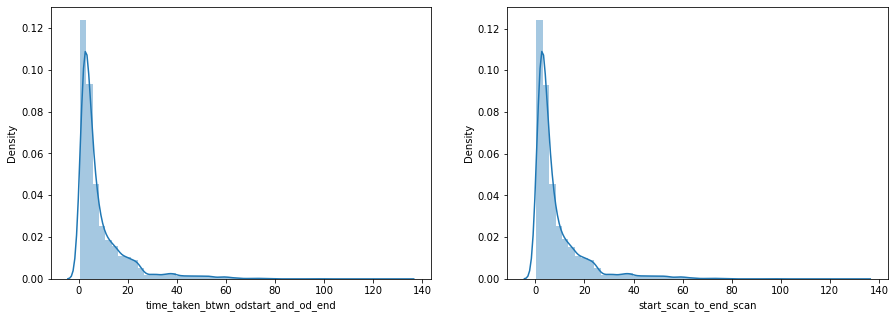

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [64]:
# KS-test : checking the distributions how closly equal thy are : 

In [65]:
stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"],start_scan_to_end_scan["start_scan_to_end_scan"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.004184382803536474, pvalue=0.9994337058695081)

In [66]:
# Transforming Data to log normal and plotting : 

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

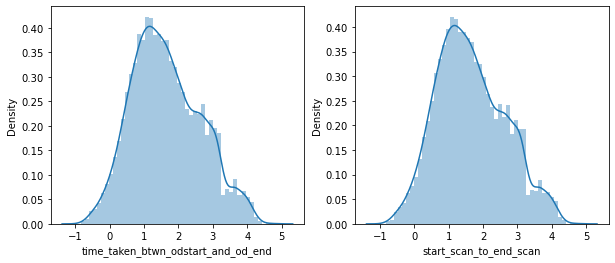

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot((np.log(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])))
plt.subplot(122)
sns.distplot((np.log(start_scan_to_end_scan["start_scan_to_end_scan"])))

In [68]:
for i in range(5):
    print(stats.ttest_ind(np.log(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))
                ,np.log(start_scan_to_end_scan["start_scan_to_end_scan"].sample(1000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.41089659846544946, pvalue=0.6811924200745696)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.6040792852527938, pvalue=0.545859512314295)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.4738549956399013, pvalue=0.6356550878284704)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.1996763306069841, pvalue=0.8417540455250604)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.1444544389103227, pvalue=0.8851562003792304)


    # from Kolmogorov–Smirnov test , p-value is 0.9943 , from which we can conclude  tht both the distributions
    # (time_taken_btwn_odstart_and_od_end and start_scan_to_end_scan) are closly similar.
    # from 2 sample t-test ,
    # we can also conclude that Average time_taken_btwn_odstart_and_od_end for population is 
    # also equal to Average start_scan_to_end_scan for population.

In [69]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean()

8.861857235305067

In [70]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean()

8.835777597804325

## Analysing `Actual Time` taken to complete the delivery per trip &  `start-scan-end-scan`

In [71]:
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,37.650000
1,trip-153671042288605164,3.000000
2,trip-153671043369099517,65.550000
3,trip-153671046011330457,1.666667
4,trip-153671052974046625,11.950000
...,...,...
14812,trip-153861095625827784,4.283333
14813,trip-153861104386292051,1.000000
14814,trip-153861106442901555,7.016667
14815,trip-153861115439069069,5.783333


<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

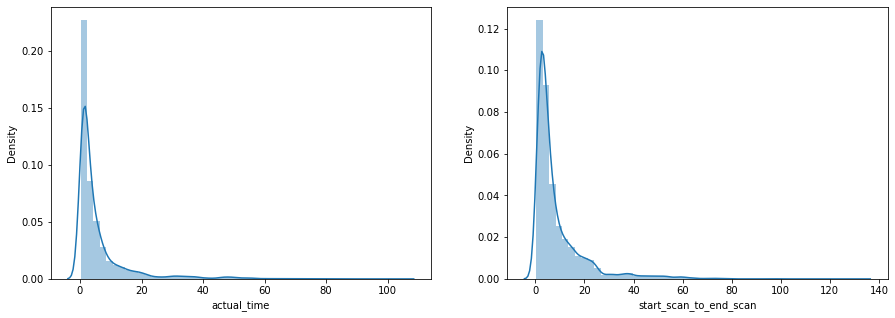

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

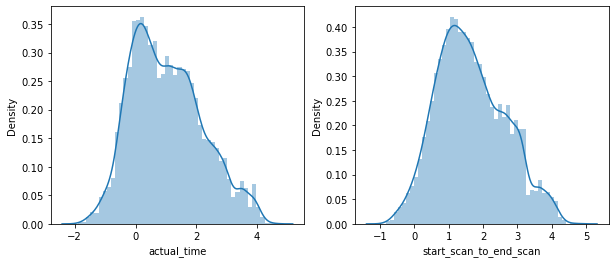

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot((np.log(actual_time["actual_time"])))
plt.subplot(122)
sns.distplot((np.log(start_scan_to_end_scan["start_scan_to_end_scan"])))

In [74]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.27387460349598436, pvalue=0.0)

In [75]:
stats.ttest_ind(np.log(actual_time["actual_time"].sample(1000))
                ,np.log(start_scan_to_end_scan["start_scan_to_end_scan"].sample(1000)))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-11.289468346129413, pvalue=1.0723063686870985e-28)

    # from KS test for actual-time and start_scan_to_end_scan 
    # from ttest of population average actual_time & population average start_scan_to_end_scan are not same.

## Analysing `Actual Time` & `TimeTaken between start and end trip time`. 

In [76]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.2765067152594992, pvalue=0.0)

In [77]:
stats.ttest_ind(np.log(actual_time["actual_time"].sample(1000))
                ,np.log(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000)))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-12.749237153192919, pvalue=7.538470866535931e-36)

    # from above kstest of distribution and two sample ttest , 
    # we can conclude that population mean Actualtime taken to complete delivery and population mean time_taken_btwn_odstart_and_od_end are also not same.

## Analysing` Actual Time` taken to complete delivery from source to destination hub & `OSRM measured time` : 

In [78]:
actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

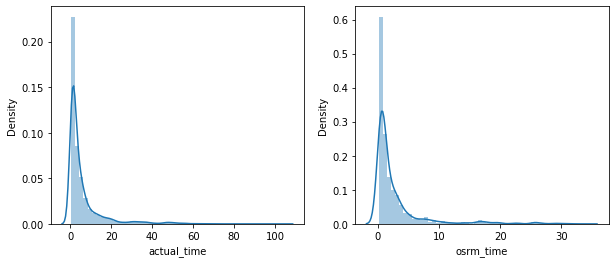

In [79]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

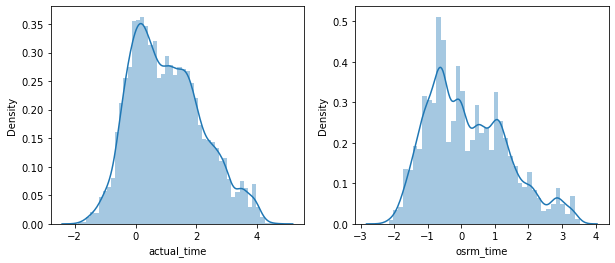

In [80]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot((np.log(actual_time["actual_time"])))
plt.subplot(122)
sns.distplot((np.log(osrm_time["osrm_time"])))

In [81]:
stats.ttest_ind(actual_time["actual_time"].sample(1000),
               osrm_time["osrm_time"].sample(1000))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=11.076195316749095, pvalue=1.0298184078549056e-27)

In [82]:
stats.ttest_ind(actual_time["actual_time"].sample(1000),
               osrm_time["osrm_time"].sample(1000),alternative='greater')

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=10.215143203833728, pvalue=3.2460309661812173e-24)

    # from ttestwe can conclude , tht population mean actual time taken to complete delivert from source to warehouse 
    # and orsm estimate mean time for population are not same. 
    # actual time is higher than the osrm estimated time for delivery.

## Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :  

In [83]:
actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


<AxesSubplot:xlabel='segment_actual_time', ylabel='Density'>

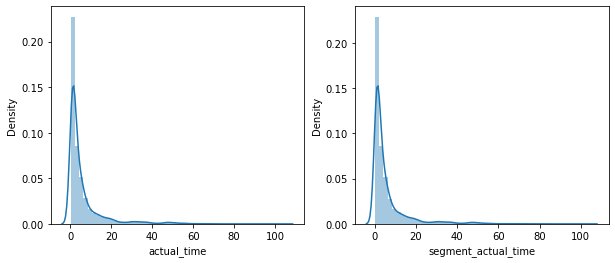

In [84]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

<AxesSubplot:xlabel='segment_actual_time', ylabel='Density'>

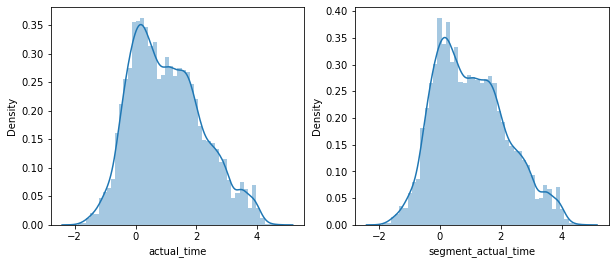

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot((np.log(actual_time["actual_time"])))
plt.subplot(122)
sns.distplot((np.log(segment_actual_time["segment_actual_time"])))

In [86]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000)),
                (segment_actual_time["segment_actual_time"].sample(1000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.5666300674566564, pvalue=0.11735953977218339)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.8530994452170468, pvalue=0.39370641511866744)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.7511491158388213, pvalue=0.45265137939123123)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.5937518217819315, pvalue=0.5527453293718834)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.5038308323707604, pvalue=0.6144358058527604)


    # from two sample ttest , we can conclude that
    Population average for
    Actual Time taken to complete delivery trip 
    and 
    segment actual time 
    are same. 
    

## Analysing osrm Time  & segment-osrm-time :  

<AxesSubplot:xlabel='segment_osrm_time', ylabel='Density'>

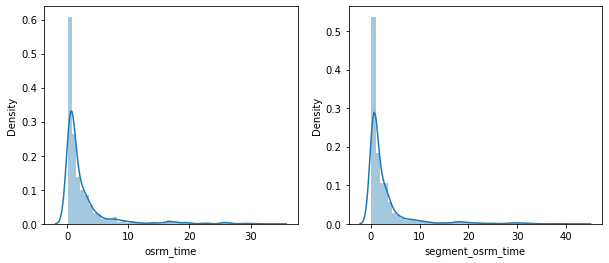

In [87]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

In [88]:
for i in range(7):
    print(stats.ttest_ind((osrm_time["osrm_time"].sample(3000)),
                (segment_osrm_time["segment_osrm_time"].sample(3000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.1626513638348075, pvalue=0.24501723780806178)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.290670510833273, pvalue=0.0220170087190278)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.1584777237776336, pvalue=0.2467152598958736)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.028319011997966, pvalue=0.00246964325081954)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.9237989537219058, pvalue=0.05442705841614627)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.5106971799942281, pvalue=0.13091829910010466)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.0812288371129197, pvalue=0.00207082455575731)


    # from ttest , we can conclude tht 
    average of osrm Time & segment-osrm-time for population is not same. 

# Analysing Distances measures : 

In [89]:
# osrm_distance – An open-source routing engine which computes the shortest path between points 
# in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

In [90]:
# segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

In [91]:
# actual_distance_to_destination – Distance in Kms between source and destination warehouse

In [92]:
# osrm_distance = data[data["is_cutoff"]==False][["trip_uuid",
#                                                 "osrm_distance"]].groupby("trip_uuid")["osrm_distance"].sum().reset_index()
# actual_distance_to_destination = data[data["is_cutoff"]==False][["trip_uuid",
#                                                                  "actual_distance_to_destination"]].groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
# segment_osrm_distance = data[["trip_uuid",
#                               "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()


## Analysing and Visulizing OSRM Estimated distance and Segment_osrm_distance  :

<AxesSubplot:xlabel='segment_osrm_distance', ylabel='Density'>

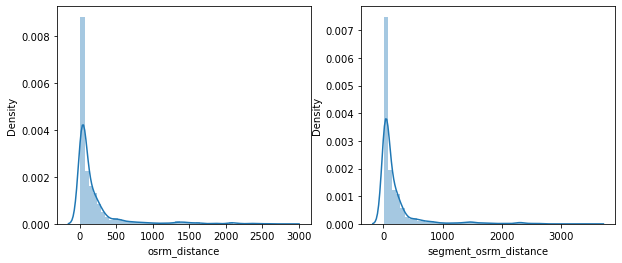

In [93]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

In [94]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10)

In [95]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(2000),
               segment_osrm_distance["segment_osrm_distance"].sample(2000)))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.1873885987496813, pvalue=0.028771894195906242)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.381811740002089, pvalue=0.01727421612436872)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.5757129830421657, pvalue=0.11517108408936179)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.7657229733387303, pvalue=0.0057057545885974194)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.1957605371701168, pvalue=0.23186093582937595)


    # from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same! 
    # but Average of osrm distance for population is same as average of segment osrm distnace 

## Analysing and Visulizing OSRM Estimated distance and Distance between source and destination warehouse :

In [96]:
actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500
...,...,...
14812,trip-153861095625827784,57.762332
14813,trip-153861104386292051,15.513784
14814,trip-153861106442901555,38.684839
14815,trip-153861115439069069,134.723836


In [97]:
osrm_distance

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14812,trip-153861095625827784,73.4630
14813,trip-153861104386292051,16.0882
14814,trip-153861106442901555,63.2841
14815,trip-153861115439069069,177.6635


<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='Density'>

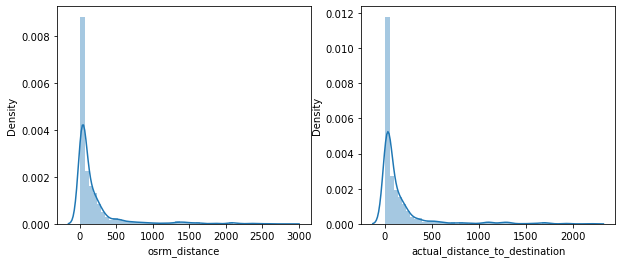

In [98]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((actual_distance_to_destination["actual_distance_to_destination"])))

In [99]:
stats.ks_2samp(osrm_distance["osrm_distance"],actual_distance_to_destination["actual_distance_to_destination"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.11837753931295136, pvalue=6.578385372142345e-91)

In [100]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(1500),
               actual_distance_to_destination["actual_distance_to_destination"].sample(1500),alternative="less"))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=3.7531753183885592, pvalue=0.9999110400578114)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=4.248487288331556, pvalue=0.9999889113079355)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=2.889983108167827, pvalue=0.9980598521078065)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=3.12920121538572, pvalue=0.9991151664491871)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=3.7708796554758193, pvalue=0.9999170932380239)


    # From left sided ttest , we can conclude 
    for population 
    osrm estimated distance is higher than the actual distacne from source to destination warehouse. 

# Merging All the numerical Fields as per TripID: 

In [101]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,
                                                                             on="trip_uuid"),
                                                                            on="trip_uuid")

In [102]:
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,
                                         on="trip_uuid",
                                         ),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

In [103]:
Merge1 = time.merge(distances,on="trip_uuid",
                                        )

In [104]:
Merge1

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635


In [105]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_day',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'source_place', 'destination_place', 'source_pincode',
       'destination_pincode', 'time_taken_btwn_odstart_and_od_end',
       'source_city_state', 'destination_city_state'],
      dtype='object')

### Number of Trips between cities , sorted highest to lowest

In [106]:
Number_of_trips_between_cities = data.groupby(["source_city_state","destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
...,...,...,...
2298,Jamui Bihar,Munger Bihar,1
2299,Shahjhnpur Uttar Pradesh,Tilhar Uttar Pradesh,1
2300,Nashik Maharashtra,Shrirampur Maharashtra,1
2301,Jamui Bihar,KharagpurBR Bihar,1


In [107]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(15)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
9,MAA Tamil Nadu,Chennai Tamil Nadu,204
10,Chennai Tamil Nadu,MAA Tamil Nadu,141
11,Bengaluru Karnataka,HBR Karnataka,133
13,Pune Maharashtra,PNQ Maharashtra,122
16,Pune Maharashtra,Bhiwandi Maharashtra,107


## Number of Routes between Cities : 

In [108]:
Number_of_routes_between_cities = data.groupby(["source_city_state","destination_city_state"])["route_schedule_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_routes_between_cities.head(15)

,source_city_state,destination_city_state,route_schedule_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,142
1,Bhiwandi Maharashtra,Mumbai Maharashtra,39
2,Mumbai Maharashtra,Mumbai Maharashtra,38
3,Delhi Delhi,Gurgaon Haryana,38
4,Mumbai Maharashtra,Bhiwandi Maharashtra,38
5,Hyderabad Telangana,Hyderabad Telangana,33
6,Chennai Tamil Nadu,Chennai Tamil Nadu,32
7,Gurgaon Haryana,Delhi Delhi,25
8,Chennai Tamil Nadu,MAA Tamil Nadu,21
9,MAA Tamil Nadu,Chennai Tamil Nadu,20


In [109]:
Number_of_routes_between_cities.loc[Number_of_routes_between_cities["source_city_state"] != Number_of_routes_between_cities["destination_city_state"]].head(15)

,source_city_state,destination_city_state,route_schedule_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,39
3,Delhi Delhi,Gurgaon Haryana,38
4,Mumbai Maharashtra,Bhiwandi Maharashtra,38
7,Gurgaon Haryana,Delhi Delhi,25
8,Chennai Tamil Nadu,MAA Tamil Nadu,21
9,MAA Tamil Nadu,Chennai Tamil Nadu,20
11,PNQ Maharashtra,Pune Maharashtra,16
12,Pune Maharashtra,PNQ Maharashtra,15
14,Bengaluru Karnataka,BLR Karnataka,13
15,Kolkata West Bengal,CCU West Bengal,13


#  Merging Location details and route_type and Numerical data on TripID : 

In [110]:
city = data.groupby("trip_uuid")[["source_city","destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

In [111]:
state = data.groupby("trip_uuid")[["source_state","destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

In [112]:
city_state = data.groupby("trip_uuid")[["source_city_state","destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

In [113]:
locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [114]:
route_type = data.groupby("trip_uuid")["route_type"].unique().reset_index()

In [115]:
Merged = route_type.merge(locations.merge(Merge1,on="trip_uuid",), on="trip_uuid",   )

In [116]:
trip_records = Merged.copy()

In [117]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])

In [118]:
route_to_merge = data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()

In [119]:
trip_records = trip_records.merge(route_to_merge,on="trip_uuid")

In [120]:
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])

In [121]:
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [122]:
df.isna().sum()

data                                     0
trip_creation_time                       0
route_schedule_uuid                      0
route_type                               0
trip_uuid                                0
source_center                            0
source_name                            293
destination_center                       0
destination_name                       261
od_start_time                            0
od_end_time                              0
start_scan_to_end_scan                   0
is_cutoff                                0
cutoff_factor                            0
cutoff_timestamp                         0
actual_distance_to_destination           0
actual_time                              0
osrm_time                                0
osrm_distance                            0
factor                                   0
segment_actual_time                      0
segment_osrm_time                        0
segment_osrm_distance                    0
segment_fac

In [123]:
# route_df['source'] = route_df['source'].str.strip("{''}")

In [124]:
trip_records.sample()

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
11200,trip-153808568861396733,Carting,Del,Gurgaon,Del Delhi,Gurgaon Haryana,Delhi,Haryana,1.016667,1.0,1.85,1.9,2.995013,2.983333,69.4593,48.939472,64.7789,thanos::sroute:42dfc300-8119-4595-a41a-98e8a19...


In [125]:
trip_records[["source_state","destination_state"]]

,source_state,destination_state
0,"[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]"
1,Karnataka,Karnataka
2,"[Karnataka, Haryana]","[Haryana, Punjab]"
3,Hub Maharashtra,Maharashtra
4,Karnataka,Karnataka
...,...,...
14812,"[Punjab, Chandigarh]",Punjab
14813,Haryana,Haryana
14814,Uttar Pradesh,Uttar Pradesh
14815,Tamil Nadu,Tamil Nadu


In [126]:
# data.groupby(["source_city","destination_city","source_city_state","destination_city_state","source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending= False)

In [127]:
trip_records.columns

Index(['trip_uuid', 'route_type', 'source_city', 'destination_city',
       'source_city_state', 'destination_city_state', 'source_state',
       'destination_state', 'segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance', 'route_schedule_uuid'],
      dtype='object')

In [128]:
trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

In [129]:
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Bengaluru Karnataka Gurgaon Haryana,Gurgaon Haryana Chandigarh Punjab,Karnataka Haryana,Haryana Punjab,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [130]:
trip_records.isna().sum()

trip_uuid                             0
route_type                            0
source_city                           0
destination_city                      0
source_city_state                     0
destination_city_state                0
source_state                          0
destination_state                     0
segment_osrm_time                     0
osrm_time                             0
segment_actual_time                   0
actual_time                           0
time_taken_btwn_odstart_and_od_end    0
start_scan_to_end_scan                0
segment_osrm_distance                 0
actual_distance_to_destination        0
osrm_distance                         0
route_schedule_uuid                   0
dtype: int64

In [156]:
# trip_records[trip_records["destination_city"]==""]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid


# Route analysis : 

In [131]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()

In [132]:
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]

In [133]:
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]

In [134]:
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]


In [135]:
F = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]


In [136]:
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]


In [137]:
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]


In [138]:
route_records = H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer")

In [139]:
route_records.sort_values(by="Average_Actual_distance_to_destination",ascending=False)

,route_schedule_uuid,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
1046,thanos::sroute:3592c86e-c3d1-429b-917a-ebe9051...,5,2157.968312,2,2,"[West Bengal, Maharashtra]","[Assam, West Bengal]","[Guwahati, Kolkata]",[FTL],"[Kolkata, Bhiwandi]"
461,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,13,2016.941915,2,2,"[Bihar, Haryana]","[Haryana, Bihar]","[Gurgaon, Muzaffrpur, Purnia]",[FTL],"[Muzaffrpur, Purnia, Gurgaon]"
1252,thanos::sroute:b3fd32d8-4027-4dc5-a425-eb8ccb8...,2,1939.975142,2,2,"[Haryana, Punjab]","[Karnataka, Haryana]","[Bengaluru, Gurgaon]",[FTL],"[Gurgaon, Chandigarh]"
55,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,22,1905.766051,2,2,"[Haryana, Karnataka]","[Punjab, Haryana]","[Chandigarh, Gurgaon]",[FTL],"[Gurgaon, Bengaluru]"
372,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,15,1869.546650,2,2,"[Haryana, Punjab]","[Karnataka, Haryana]","[Bengaluru, Gurgaon]",[FTL],"[Gurgaon, Chandigarh]"
...,...,...,...,...,...,...,...,...,...,...
1385,thanos::sroute:50fd07d6-9217-49dd-b510-3a68bf6...,1,9.042020,1,1,[Karnataka],[Karnataka],[Bengaluru],[Carting],[Bengaluru]
1463,thanos::sroute:dff6e62a-3e95-42e9-9794-b5125f8...,1,9.040986,1,1,[Tamil Nadu],[Tamil Nadu],[Salem],[Carting],[Salem]
1266,thanos::sroute:62545fd8-0a6d-4ede-87c9-71fdc9a...,2,9.032299,1,1,[Tamil Nadu],[Tamil Nadu],[Chennai],[Carting],[Chennai]
1365,thanos::sroute:fb962457-a420-4283-b216-55fd2ba...,1,9.027513,1,1,[Uttar Pradesh],[Uttar Pradesh],[Varanasi],[Carting],[Varanasi]


In [ ]:
# df.loc[df.isnull().any(axis=1)]
# 